In [1]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Set current directory and work relative to it
os.chdir('E:/gitlab/project_on_python/deep time series forcasting/Practical-Time-Series-Analysis-master')

In [3]:
# Load Dataset
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


In [4]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
              inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


# function for single exponential smoothing

In [5]:
# Function for Sigle exponential smoothing
def single_exp_smoothing(x, alpha):
    F = [x[0]] # first value is same as series
    for t in range(1, len(x)):
        F.append(alpha * x[t] + (1 - alpha) * F[t-1])
    return F

In [6]:
ibm_df['SES'] = single_exp_smoothing(ibm_df['Close_Price'], 0.8)

# plot

<IPython.core.display.Javascript object>


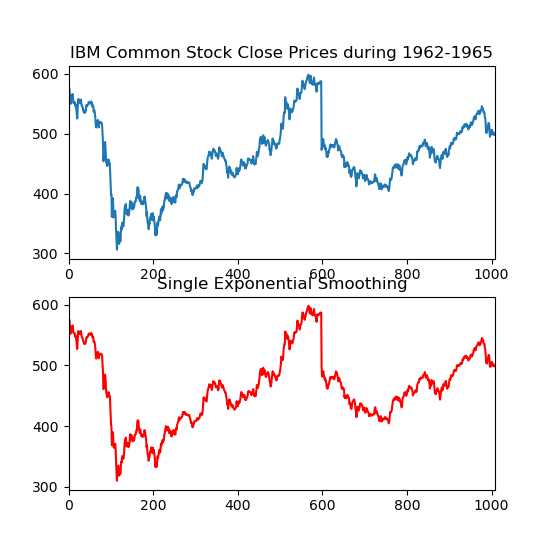

In [8]:
### Plot Single Exponential Smoothing forecasted value
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax)
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['SES'].plot(ax=ax, color='r')
ax.set_title('Single Exponential Smoothing')
# plt.savefig('plots/ch2/B07887_02_14.png', format='png', dpi=300)
plt.show()

<IPython.core.display.Javascript object>


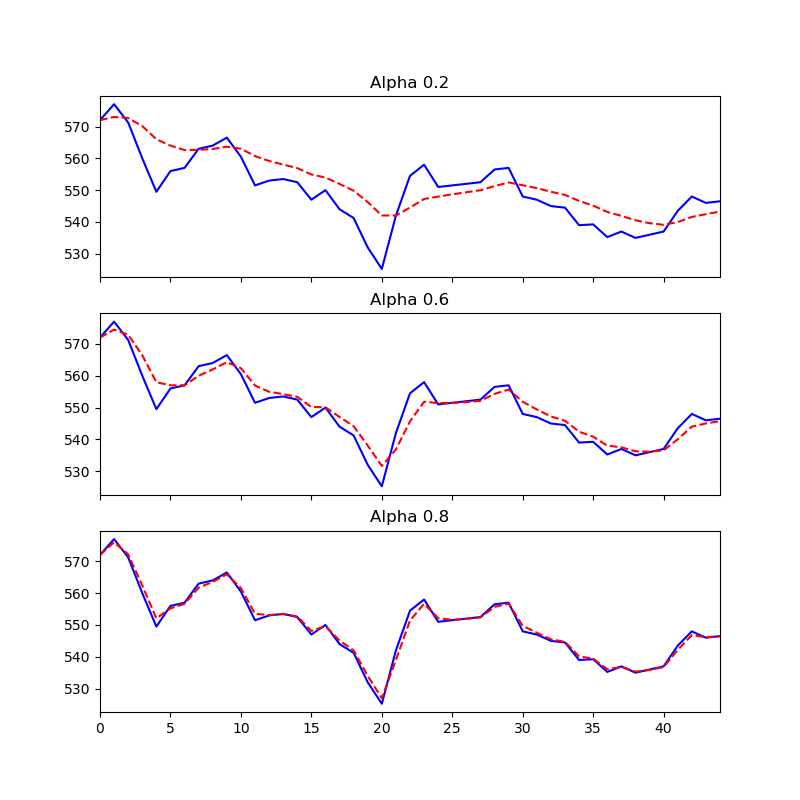

In [14]:
# Plot the forecasted values using multiple alpha values
#Calculate the moving averages using 'rolling' and 'mean' functions
ibm_df['SES2']  = single_exp_smoothing(ibm_df['Close_Price'], 0.2)
ibm_df['SES6']= single_exp_smoothing(ibm_df['Close_Price'], 0.5)
ibm_df['SES8']= single_exp_smoothing(ibm_df['Close_Price'], 0.8)

# Plot the curves
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(8,8)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
ibm_df['SES2'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
axarr[0].set_title('Alpha 0.2')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
ibm_df['SES6'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
axarr[1].set_title('Alpha 0.6')

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
ibm_df['SES8'].iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
axarr[2].set_title('Alpha 0.8')
# plt.savefig('plots/ch2/B07887_02_15.png', format='png', dpi=300)
plt.show()


In [34]:
mse = 0
for i in range (len(ibm_df['SES6'])-2):
    mse = mse + (ibm_df['Close_Price'][i] - ibm_df['SES6'][i])**2
print(mse/(float(len(ibm_df['SES6'])-2)))

14.744823156181766


In [36]:
mas = 0
for i in range (len(ibm_df['SES6'])-2):
    mas = mas + abs(ibm_df['Close_Price'][i] - ibm_df['SES6'][i])
print(mas/(float(len(ibm_df['SES6'])-2)))

2.414970568170005
